In [512]:
import pandas as pd
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [513]:
vote_file = pd.read_csv('brexit_full_updated3.csv')
vote_file

,Constituency ID,full name,PANO,Constituency Name,Party abbreviation,conShare,conShare2,conShare3,bill161,leave,party_old,ref,ref_dummy,party,old_party
0,E14000530,Gerald Howarth,7,Aldershot,Con,50.59,73.403947,73.403947,1.0,1.0,1.0,0.578978,1,1.0,1.0
1,E14000531,Wendy Morton,8,Aldridge-Brownhills,Con,52.05,69.940876,69.940876,1.0,0.0,1.0,0.677963,1,0.0,0.0
2,E14000532,Graham Brady,9,Altrincham and Sale West,Con,52.99,66.503514,66.503514,1.0,1.0,1.0,0.385878,0,1.0,1.0
3,E14000533,Nigel Mills,11,Amber Valley,Con,43.98,55.840528,55.840528,1.0,1.0,1.0,0.652991,1,1.0,1.0
4,E14000534,Nick Herbert,18,Arundel and South Downs,Con,60.79,84.442284,84.442284,NaN,0.0,1.0,0.497011,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,W07000076,Wayne David,114,Caerphilly,Lab,16.59,27.223499,27.223499,1.0,0.0,0.0,0.551360,1,0.0,NaN
656,W07000077,Chris Evans,336,Islwyn,Lab,15.16,23.639482,23.639482,1.0,0.0,0.0,0.589399,1,0.0,NaN
657,W07000078,Alun Cairns,589,Vale Of Glamorgan,Con,46.02,58.527280,58.527280,1.0,0.0,1.0,0.525507,1,0.0,0.0
658,W07000079,Kevin Brennan,129,Cardiff West,Lab,25.15,38.221884,38.221884,0.0,0.0,0.0,0.438226,0,0.0,NaN


In [514]:
len(vote_file.loc[(vote_file['party'] == 1) & (vote_file['Party abbreviation'] == 'Lab')])

11

In [515]:
vote_file = vote_file.dropna(subset=['party_old', 'party'])
vote_file

,Constituency ID,full name,PANO,Constituency Name,Party abbreviation,conShare,conShare2,conShare3,bill161,leave,party_old,ref,ref_dummy,party,old_party
0,E14000530,Gerald Howarth,7,Aldershot,Con,50.59,73.403947,73.403947,1.0,1.0,1.0,0.578978,1,1.0,1.0
1,E14000531,Wendy Morton,8,Aldridge-Brownhills,Con,52.05,69.940876,69.940876,1.0,0.0,1.0,0.677963,1,0.0,0.0
2,E14000532,Graham Brady,9,Altrincham and Sale West,Con,52.99,66.503514,66.503514,1.0,1.0,1.0,0.385878,0,1.0,1.0
3,E14000533,Nigel Mills,11,Amber Valley,Con,43.98,55.840528,55.840528,1.0,1.0,1.0,0.652991,1,1.0,1.0
4,E14000534,Nick Herbert,18,Arundel and South Downs,Con,60.79,84.442284,84.442284,NaN,0.0,1.0,0.497011,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,W07000076,Wayne David,114,Caerphilly,Lab,16.59,27.223499,27.223499,1.0,0.0,0.0,0.551360,1,0.0,NaN
656,W07000077,Chris Evans,336,Islwyn,Lab,15.16,23.639482,23.639482,1.0,0.0,0.0,0.589399,1,0.0,NaN
657,W07000078,Alun Cairns,589,Vale Of Glamorgan,Con,46.02,58.527280,58.527280,1.0,0.0,1.0,0.525507,1,0.0,0.0
658,W07000079,Kevin Brennan,129,Cardiff West,Lab,25.15,38.221884,38.221884,0.0,0.0,0.0,0.438226,0,0.0,NaN


In [516]:
leave = vote_file.loc[vote_file['party'] == 1]['full name'].values
remain = vote_file.loc[vote_file['party'] == 0]['full name'].values
cons = vote_file.loc[vote_file['party_old'] == 0]['full name'].values
labour = vote_file.loc[vote_file['party_old'] == 1]['full name'].values

In [517]:
session_file = pd.read_csv('WordFreqYear15-16ByMP_Bigrams.csv')
session_file = session_file.drop(['Unnamed: 0'], axis=1)
session_file = session_file.sort_values(by=['freq', 'bigrams']).reset_index(drop=True)
session_file = session_file.loc[session_file.freq > 1]
session_file

,MPs,bigrams,freq
3511322,Nick Gibb,a*.gcse,2
3511323,Siobhain McDonagh,a*.grade,2
3511324,Lucy Powell,a-level.cours,2
3511325,Caroline Nokes,a-level.educ,2
3511326,Caroline Dinenage,a-level.entri,2
...,...,...,...
3880981,Christopher Grayling,hon.friend,680
3880982,Christopher Grayling,hon.gentleman,707
3880983,Theresa May,hon.gentleman,906
3880984,Theresa May,right.hon,925


In [518]:
session_file_eu = pd.read_csv('WordFreqYear15-16ByMP_Bigrams(1).csv')
session_file_eu = session_file_eu.drop(['Unnamed: 0'], axis=1)
session_file_eu = session_file_eu.sort_values(by=['freq', 'bigrams']).reset_index(drop=True)
session_file_eu = session_file_eu.loc[session_file_eu.freq > 1]
session_file_eu

,MPs,bigrams,freq
127831,Natascha Engel,a1.consequenti,2
127832,Steve McCabe,abdelhamid.abaaoud,2
127833,Theresa May,abil.act,2
127834,Theresa May,abil.deport,2
127835,Philip Hollobone,abil.negoti,2
...,...,...,...
136525,David Cameron,singl.market,50
136526,David Lidington,unit.kingdom,64
136527,Jeremy Wright,human.right,66
136528,David Cameron,european.union,74


In [550]:
leave_session = session_file.loc[session_file['MPs'].isin(leave)]
remain_session = session_file.loc[session_file['MPs'].isin(remain)]
cons_session = session_file.loc[session_file['MPs'].isin(cons)]
labour_session = session_file.loc[session_file['MPs'].isin(labour)]
leave_cons_session = session_file.loc[(session_file['MPs'].isin(leave)) & (session_file['MPs'].isin(cons))]
leave_labor_session = session_file.loc[(session_file['MPs'].isin(leave)) & (session_file['MPs'].isin(labour))]
remain_cons_session = session_file.loc[(session_file['MPs'].isin(remain)) & (session_file['MPs'].isin(cons))]
remain_labor_session = session_file.loc[(session_file['MPs'].isin(remain)) & (session_file['MPs'].isin(labour))]

In [551]:
leave_bigrams = leave_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
remain_bigrams = remain_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
cons_bigrams = cons_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
labour_bigrams = labour_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
leave_cons_bigrams = leave_cons_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
leave_labor_bigrams = leave_labor_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
remain_cons_bigrams = remain_cons_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()
remain_labor_bigrams = remain_labor_session[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum()

In [552]:
remain_labor_bigrams

,bigrams,freq
0,a*.gcse,2
1,a-level.choic,3
2,a-level.educ,2
3,a-level.entri,6
4,a-level.exam,2
...,...,...
74071,zone.right,2
74072,zone.safe,2
74073,zone.six,2
74074,zone.thoresbi,2


In [553]:
all_bigrams = session_file_eu[['bigrams', 'freq']].groupby(['bigrams'], as_index=False).sum().sort_values(by=['freq'])
all_bigrams = all_bigrams.reset_index(drop=True)
all_bigrams

,bigrams,freq
0,a1.consequenti,2
1,opportun.discuss,2
2,opportun.differ,2
3,opportun.debat,2
4,opportun.confirm,2
...,...,...
6098,singl.market,184
6099,british.peopl,191
6100,northern.ireland,218
6101,unit.kingdom,352


In [554]:
leave_bigrams = leave_bigrams.sort_values(by=['freq']).reset_index(drop=True)
remain_bigrams = remain_bigrams.sort_values(by=['freq']).reset_index(drop=True)
cons_bigrams = cons_bigrams.sort_values(by=['freq']).reset_index(drop=True)
labour_bigrams = labour_bigrams.sort_values(by=['freq']).reset_index(drop=True)

leave_cons_bigrams = leave_cons_bigrams.sort_values(by=['freq']).reset_index(drop=True)
leave_labor_bigrams = leave_labor_bigrams.sort_values(by=['freq']).reset_index(drop=True)
remain_cons_bigrams = remain_cons_bigrams.sort_values(by=['freq']).reset_index(drop=True)
remain_labor_bigrams = remain_labor_bigrams.sort_values(by=['freq']).reset_index(drop=True)

In [555]:
total_bigrams = all_bigrams['freq'].sum()
total_bigrams

24467

In [570]:
n = len(all_bigrams)
upper_bound = int(1*n)
lower_bound = int(0)
print(upper_bound, lower_bound)

6103 0


In [571]:
selected_bigrams = all_bigrams[lower_bound:upper_bound]

In [572]:
selected_bigram_freq = selected_bigrams['freq'].sum()

In [573]:
leave_vector = []
remain_vector = []
cons_vector = []
labour_vector = []
leave_cons_vector = []
leave_labor_vector = []
remain_cons_vector = []
remain_labor_vector = []

In [574]:
for bigram in tqdm(selected_bigrams['bigrams'].values):
    if bigram in leave_bigrams['bigrams'].values:
        leave_vector.append(leave_bigrams.loc[leave_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        leave_vector.append(0)
        
    if bigram in remain_bigrams['bigrams'].values:
        remain_vector.append(remain_bigrams.loc[remain_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        remain_vector.append(0)
        
    if bigram in cons_bigrams['bigrams'].values:
        cons_vector.append(cons_bigrams.loc[cons_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        cons_vector.append(0)
        
    if bigram in labour_bigrams['bigrams'].values:
        labour_vector.append(labour_bigrams.loc[labour_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        labour_vector.append(0)
        








  0%|          | 0/6103 [00:00<?, ?it/s]






  0%|          | 2/6103 [00:00<11:15,  9.04it/s]






  0%|          | 3/6103 [00:00<11:08,  9.13it/s]






  0%|          | 4/6103 [00:00<12:33,  8.10it/s]






  0%|          | 6/6103 [00:00<12:03,  8.42it/s]






  0%|          | 7/6103 [00:00<13:10,  7.71it/s]






  0%|          | 8/6103 [00:00<13:19,  7.62it/s]






  0%|          | 9/6103 [00:01<13:36,  7.46it/s]






  0%|          | 10/6103 [00:01<13:57,  7.28it/s]






  0%|          | 11/6103 [00:01<14:02,  7.23it/s]






  0%|          | 12/6103 [00:01<13:58,  7.26it/s]






  0%|          | 13/6103 [00:01<14:15,  7.12it/s]






  0%|          | 14/6103 [00:01<14:29,  7.00it/s]






  0%|          | 15/6103 [00:01<14:31,  6.98it/s]






  0%|          | 16/6103 [00:02<14:21,  7.06it/s]






  0%|          | 18/6103 [00:02<13:25,  7.55it/s]






  0%|          | 19/6103 [00:02<12:57,  7.83it/s]






  0%|          | 20/6103 [00:02<12:20,  8.22it/s]






 

  5%|▌         | 310/6103 [00:32<09:41,  9.96it/s]






  5%|▌         | 312/6103 [00:33<08:37, 11.19it/s]






  5%|▌         | 314/6103 [00:33<08:11, 11.77it/s]






  5%|▌         | 316/6103 [00:33<08:29, 11.35it/s]






  5%|▌         | 318/6103 [00:33<08:48, 10.94it/s]






  5%|▌         | 320/6103 [00:33<08:59, 10.71it/s]






  5%|▌         | 322/6103 [00:34<08:54, 10.82it/s]






  5%|▌         | 324/6103 [00:34<09:06, 10.57it/s]






  5%|▌         | 326/6103 [00:34<08:44, 11.02it/s]






  5%|▌         | 328/6103 [00:34<08:17, 11.61it/s]






  5%|▌         | 330/6103 [00:34<08:35, 11.20it/s]






  5%|▌         | 332/6103 [00:34<08:45, 10.98it/s]






  5%|▌         | 334/6103 [00:35<08:11, 11.74it/s]






  6%|▌         | 336/6103 [00:35<08:06, 11.85it/s]






  6%|▌         | 338/6103 [00:35<08:26, 11.39it/s]






  6%|▌         | 340/6103 [00:35<08:25, 11.41it/s]






  6%|▌         | 342/6103 [00:35<07:57, 12.06it/s]






  6%|▌         | 344/6103 [00:3

 11%|█         | 672/6103 [01:06<06:40, 13.55it/s]






 11%|█         | 674/6103 [01:06<06:40, 13.56it/s]






 11%|█         | 676/6103 [01:06<06:38, 13.63it/s]






 11%|█         | 678/6103 [01:06<07:00, 12.89it/s]






 11%|█         | 680/6103 [01:06<07:16, 12.43it/s]






 11%|█         | 682/6103 [01:07<07:02, 12.83it/s]






 11%|█         | 684/6103 [01:07<06:56, 13.01it/s]






 11%|█         | 686/6103 [01:07<06:17, 14.36it/s]






 11%|█▏        | 688/6103 [01:07<06:30, 13.86it/s]






 11%|█▏        | 690/6103 [01:07<06:53, 13.09it/s]






 11%|█▏        | 692/6103 [01:07<06:43, 13.41it/s]






 11%|█▏        | 694/6103 [01:07<06:28, 13.93it/s]






 11%|█▏        | 696/6103 [01:08<06:43, 13.42it/s]






 11%|█▏        | 698/6103 [01:08<06:44, 13.35it/s]






 11%|█▏        | 700/6103 [01:08<06:54, 13.03it/s]






 12%|█▏        | 702/6103 [01:08<06:15, 14.38it/s]






 12%|█▏        | 704/6103 [01:08<07:41, 11.70it/s]






 12%|█▏        | 706/6103 [01:0

 18%|█▊        | 1101/6103 [01:37<05:46, 14.46it/s]






 18%|█▊        | 1103/6103 [01:37<05:41, 14.64it/s]






 18%|█▊        | 1106/6103 [01:38<05:10, 16.11it/s]






 18%|█▊        | 1108/6103 [01:38<05:03, 16.48it/s]






 18%|█▊        | 1110/6103 [01:38<05:21, 15.52it/s]






 18%|█▊        | 1113/6103 [01:38<04:37, 18.00it/s]






 18%|█▊        | 1116/6103 [01:38<04:04, 20.40it/s]






 18%|█▊        | 1119/6103 [01:38<04:55, 16.87it/s]






 18%|█▊        | 1121/6103 [01:38<05:05, 16.28it/s]






 18%|█▊        | 1123/6103 [01:39<05:26, 15.27it/s]






 18%|█▊        | 1125/6103 [01:39<05:13, 15.88it/s]






 18%|█▊        | 1127/6103 [01:39<05:08, 16.12it/s]






 18%|█▊        | 1129/6103 [01:39<05:25, 15.27it/s]






 19%|█▊        | 1131/6103 [01:39<05:18, 15.60it/s]






 19%|█▊        | 1133/6103 [01:39<05:49, 14.23it/s]






 19%|█▊        | 1135/6103 [01:39<06:09, 13.44it/s]






 19%|█▊        | 1137/6103 [01:40<06:22, 12.98it/s]






 19%|█▊       

 25%|██▍       | 1497/6103 [02:08<08:33,  8.96it/s]






 25%|██▍       | 1499/6103 [02:08<07:37, 10.07it/s]






 25%|██▍       | 1501/6103 [02:08<06:48, 11.25it/s]






 25%|██▍       | 1503/6103 [02:08<07:53,  9.71it/s]






 25%|██▍       | 1505/6103 [02:09<08:59,  8.53it/s]






 25%|██▍       | 1506/6103 [02:09<09:38,  7.95it/s]






 25%|██▍       | 1507/6103 [02:09<10:07,  7.57it/s]






 25%|██▍       | 1508/6103 [02:09<10:11,  7.52it/s]






 25%|██▍       | 1509/6103 [02:09<10:40,  7.17it/s]






 25%|██▍       | 1510/6103 [02:09<10:02,  7.63it/s]






 25%|██▍       | 1512/6103 [02:09<09:19,  8.20it/s]






 25%|██▍       | 1513/6103 [02:10<09:49,  7.78it/s]






 25%|██▍       | 1514/6103 [02:10<09:50,  7.77it/s]






 25%|██▍       | 1515/6103 [02:10<10:01,  7.63it/s]






 25%|██▍       | 1517/6103 [02:10<08:19,  9.19it/s]






 25%|██▍       | 1519/6103 [02:10<08:23,  9.10it/s]






 25%|██▍       | 1521/6103 [02:10<08:34,  8.91it/s]






 25%|██▍      

 30%|███       | 1836/6103 [02:41<07:28,  9.52it/s]






 30%|███       | 1838/6103 [02:41<07:07,  9.99it/s]






 30%|███       | 1840/6103 [02:42<07:21,  9.66it/s]






 30%|███       | 1842/6103 [02:42<06:32, 10.86it/s]






 30%|███       | 1844/6103 [02:42<06:21, 11.16it/s]






 30%|███       | 1846/6103 [02:42<06:35, 10.77it/s]






 30%|███       | 1848/6103 [02:42<06:17, 11.28it/s]






 30%|███       | 1850/6103 [02:42<06:36, 10.71it/s]






 30%|███       | 1852/6103 [02:43<06:42, 10.57it/s]






 30%|███       | 1854/6103 [02:43<06:23, 11.08it/s]






 30%|███       | 1856/6103 [02:43<06:50, 10.35it/s]






 30%|███       | 1858/6103 [02:43<07:13,  9.79it/s]






 30%|███       | 1860/6103 [02:43<07:23,  9.57it/s]






 30%|███       | 1861/6103 [02:44<07:22,  9.58it/s]






 31%|███       | 1862/6103 [02:44<07:34,  9.33it/s]






 31%|███       | 1863/6103 [02:44<07:32,  9.38it/s]






 31%|███       | 1865/6103 [02:44<07:22,  9.57it/s]






 31%|███      

 37%|███▋      | 2228/6103 [03:18<05:25, 11.91it/s]






 37%|███▋      | 2230/6103 [03:18<05:03, 12.75it/s]






 37%|███▋      | 2232/6103 [03:18<04:50, 13.32it/s]






 37%|███▋      | 2234/6103 [03:18<05:30, 11.72it/s]






 37%|███▋      | 2236/6103 [03:18<05:44, 11.24it/s]






 37%|███▋      | 2238/6103 [03:18<05:31, 11.68it/s]






 37%|███▋      | 2240/6103 [03:19<05:21, 12.02it/s]






 37%|███▋      | 2242/6103 [03:19<05:14, 12.27it/s]






 37%|███▋      | 2244/6103 [03:19<05:42, 11.27it/s]






 37%|███▋      | 2246/6103 [03:19<05:46, 11.13it/s]






 37%|███▋      | 2248/6103 [03:19<05:51, 10.96it/s]






 37%|███▋      | 2250/6103 [03:20<06:10, 10.41it/s]






 37%|███▋      | 2252/6103 [03:20<06:23, 10.04it/s]






 37%|███▋      | 2254/6103 [03:20<06:11, 10.37it/s]






 37%|███▋      | 2256/6103 [03:20<06:01, 10.65it/s]






 37%|███▋      | 2258/6103 [03:20<05:41, 11.25it/s]






 37%|███▋      | 2260/6103 [03:20<06:02, 10.59it/s]






 37%|███▋     

 43%|████▎     | 2625/6103 [03:51<04:14, 13.66it/s]






 43%|████▎     | 2627/6103 [03:51<04:16, 13.57it/s]






 43%|████▎     | 2629/6103 [03:52<04:23, 13.16it/s]






 43%|████▎     | 2631/6103 [03:52<04:19, 13.40it/s]






 43%|████▎     | 2633/6103 [03:52<03:57, 14.62it/s]






 43%|████▎     | 2635/6103 [03:52<04:11, 13.78it/s]






 43%|████▎     | 2637/6103 [03:52<04:17, 13.44it/s]






 43%|████▎     | 2639/6103 [03:52<04:26, 12.98it/s]






 43%|████▎     | 2641/6103 [03:53<04:25, 13.05it/s]






 43%|████▎     | 2643/6103 [03:53<04:34, 12.60it/s]






 43%|████▎     | 2645/6103 [03:53<04:18, 13.39it/s]






 43%|████▎     | 2648/6103 [03:53<03:49, 15.03it/s]






 43%|████▎     | 2650/6103 [03:53<03:55, 14.69it/s]






 43%|████▎     | 2652/6103 [03:53<04:06, 13.97it/s]






 43%|████▎     | 2654/6103 [03:53<04:00, 14.32it/s]






 44%|████▎     | 2656/6103 [03:54<04:07, 13.95it/s]






 44%|████▎     | 2659/6103 [03:54<03:48, 15.05it/s]






 44%|████▎    

 50%|████▉     | 3036/6103 [04:23<07:07,  7.18it/s]






 50%|████▉     | 3037/6103 [04:23<06:40,  7.66it/s]






 50%|████▉     | 3038/6103 [04:23<06:41,  7.64it/s]






 50%|████▉     | 3039/6103 [04:23<06:55,  7.38it/s]






 50%|████▉     | 3040/6103 [04:23<06:38,  7.69it/s]






 50%|████▉     | 3041/6103 [04:24<06:18,  8.08it/s]






 50%|████▉     | 3042/6103 [04:24<06:34,  7.75it/s]






 50%|████▉     | 3043/6103 [04:24<06:30,  7.84it/s]






 50%|████▉     | 3044/6103 [04:24<06:28,  7.88it/s]






 50%|████▉     | 3046/6103 [04:24<05:41,  8.95it/s]






 50%|████▉     | 3047/6103 [04:24<05:53,  8.65it/s]






 50%|████▉     | 3049/6103 [04:24<05:24,  9.43it/s]






 50%|████▉     | 3050/6103 [04:24<05:39,  8.99it/s]






 50%|████▉     | 3051/6103 [04:25<05:39,  8.99it/s]






 50%|█████     | 3053/6103 [04:25<05:05,  9.97it/s]






 50%|█████     | 3055/6103 [04:25<05:14,  9.70it/s]






 50%|█████     | 3057/6103 [04:25<05:12,  9.74it/s]






 50%|█████    

 55%|█████▌    | 3366/6103 [04:55<04:59,  9.14it/s]






 55%|█████▌    | 3367/6103 [04:56<05:06,  8.91it/s]






 55%|█████▌    | 3368/6103 [04:56<05:03,  9.00it/s]






 55%|█████▌    | 3370/6103 [04:56<04:52,  9.33it/s]






 55%|█████▌    | 3371/6103 [04:56<04:55,  9.25it/s]






 55%|█████▌    | 3373/6103 [04:56<04:33,  9.99it/s]






 55%|█████▌    | 3375/6103 [04:56<04:28, 10.16it/s]






 55%|█████▌    | 3377/6103 [04:56<04:37,  9.83it/s]






 55%|█████▌    | 3378/6103 [04:57<04:37,  9.81it/s]






 55%|█████▌    | 3379/6103 [04:57<04:44,  9.57it/s]






 55%|█████▌    | 3380/6103 [04:57<04:56,  9.20it/s]






 55%|█████▌    | 3381/6103 [04:57<04:54,  9.23it/s]






 55%|█████▌    | 3383/6103 [04:57<04:30, 10.05it/s]






 55%|█████▌    | 3385/6103 [04:57<04:44,  9.56it/s]






 55%|█████▌    | 3386/6103 [04:57<04:55,  9.18it/s]






 55%|█████▌    | 3387/6103 [04:58<04:52,  9.28it/s]






 56%|█████▌    | 3389/6103 [04:58<04:26, 10.18it/s]






 56%|█████▌   

 61%|██████    | 3713/6103 [05:30<04:09,  9.58it/s]






 61%|██████    | 3714/6103 [05:30<04:16,  9.31it/s]






 61%|██████    | 3715/6103 [05:30<04:12,  9.47it/s]






 61%|██████    | 3716/6103 [05:30<04:22,  9.09it/s]






 61%|██████    | 3717/6103 [05:30<04:23,  9.06it/s]






 61%|██████    | 3718/6103 [05:30<04:23,  9.04it/s]






 61%|██████    | 3719/6103 [05:30<04:24,  9.01it/s]






 61%|██████    | 3720/6103 [05:30<04:20,  9.14it/s]






 61%|██████    | 3721/6103 [05:30<04:16,  9.27it/s]






 61%|██████    | 3723/6103 [05:31<03:58,  9.98it/s]






 61%|██████    | 3725/6103 [05:31<03:40, 10.81it/s]






 61%|██████    | 3727/6103 [05:31<03:32, 11.17it/s]






 61%|██████    | 3729/6103 [05:31<03:48, 10.38it/s]






 61%|██████    | 3731/6103 [05:31<03:59,  9.92it/s]






 61%|██████    | 3733/6103 [05:32<04:01,  9.81it/s]






 61%|██████    | 3734/6103 [05:32<04:03,  9.74it/s]






 61%|██████    | 3735/6103 [05:32<04:05,  9.66it/s]






 61%|██████   

 67%|██████▋   | 4092/6103 [06:05<03:22,  9.92it/s]






 67%|██████▋   | 4093/6103 [06:06<04:37,  7.23it/s]






 67%|██████▋   | 4094/6103 [06:06<04:51,  6.88it/s]






 67%|██████▋   | 4095/6103 [06:06<04:50,  6.91it/s]






 67%|██████▋   | 4097/6103 [06:06<04:28,  7.48it/s]






 67%|██████▋   | 4098/6103 [06:06<04:36,  7.24it/s]






 67%|██████▋   | 4099/6103 [06:06<04:44,  7.06it/s]






 67%|██████▋   | 4101/6103 [06:06<03:56,  8.47it/s]






 67%|██████▋   | 4102/6103 [06:07<03:48,  8.77it/s]






 67%|██████▋   | 4103/6103 [06:07<04:02,  8.23it/s]






 67%|██████▋   | 4104/6103 [06:07<04:13,  7.89it/s]






 67%|██████▋   | 4106/6103 [06:07<03:53,  8.54it/s]






 67%|██████▋   | 4108/6103 [06:07<03:39,  9.11it/s]






 67%|██████▋   | 4110/6103 [06:07<03:29,  9.51it/s]






 67%|██████▋   | 4111/6103 [06:08<03:46,  8.80it/s]






 67%|██████▋   | 4112/6103 [06:08<03:55,  8.44it/s]






 67%|██████▋   | 4113/6103 [06:08<04:00,  8.29it/s]






 67%|██████▋  

 73%|███████▎  | 4441/6103 [06:37<03:04,  9.00it/s]






 73%|███████▎  | 4442/6103 [06:38<03:10,  8.71it/s]






 73%|███████▎  | 4443/6103 [06:38<03:12,  8.60it/s]






 73%|███████▎  | 4445/6103 [06:38<03:07,  8.85it/s]






 73%|███████▎  | 4446/6103 [06:38<03:14,  8.53it/s]






 73%|███████▎  | 4447/6103 [06:38<03:17,  8.39it/s]






 73%|███████▎  | 4448/6103 [06:38<03:22,  8.18it/s]






 73%|███████▎  | 4449/6103 [06:38<03:35,  7.67it/s]






 73%|███████▎  | 4450/6103 [06:39<03:49,  7.20it/s]






 73%|███████▎  | 4451/6103 [06:39<03:35,  7.68it/s]






 73%|███████▎  | 4452/6103 [06:39<03:49,  7.20it/s]






 73%|███████▎  | 4453/6103 [06:39<03:58,  6.91it/s]






 73%|███████▎  | 4454/6103 [06:39<04:06,  6.69it/s]






 73%|███████▎  | 4455/6103 [06:39<04:02,  6.80it/s]






 73%|███████▎  | 4456/6103 [06:39<03:55,  6.99it/s]






 73%|███████▎  | 4457/6103 [06:40<03:38,  7.54it/s]






 73%|███████▎  | 4458/6103 [06:40<03:39,  7.48it/s]






 73%|███████▎ 

 79%|███████▊  | 4803/6103 [07:13<03:00,  7.22it/s]






 79%|███████▊  | 4804/6103 [07:14<03:02,  7.12it/s]






 79%|███████▊  | 4805/6103 [07:14<02:58,  7.29it/s]






 79%|███████▊  | 4806/6103 [07:14<02:54,  7.42it/s]






 79%|███████▉  | 4807/6103 [07:14<02:50,  7.61it/s]






 79%|███████▉  | 4808/6103 [07:14<02:49,  7.63it/s]






 79%|███████▉  | 4809/6103 [07:14<02:40,  8.05it/s]






 79%|███████▉  | 4811/6103 [07:14<02:29,  8.64it/s]






 79%|███████▉  | 4813/6103 [07:15<02:23,  8.96it/s]






 79%|███████▉  | 4815/6103 [07:15<02:10,  9.90it/s]






 79%|███████▉  | 4817/6103 [07:15<02:11,  9.76it/s]






 79%|███████▉  | 4819/6103 [07:15<02:05, 10.21it/s]






 79%|███████▉  | 4821/6103 [07:15<01:58, 10.83it/s]






 79%|███████▉  | 4823/6103 [07:15<01:53, 11.24it/s]






 79%|███████▉  | 4826/6103 [07:16<01:40, 12.72it/s]






 79%|███████▉  | 4828/6103 [07:16<01:53, 11.26it/s]






 79%|███████▉  | 4830/6103 [07:16<01:50, 11.48it/s]






 79%|███████▉ 

 83%|████████▎ | 5077/6103 [07:44<02:26,  7.02it/s]






 83%|████████▎ | 5078/6103 [07:44<02:25,  7.03it/s]






 83%|████████▎ | 5079/6103 [07:44<02:27,  6.93it/s]






 83%|████████▎ | 5080/6103 [07:44<02:25,  7.05it/s]






 83%|████████▎ | 5081/6103 [07:44<02:14,  7.58it/s]






 83%|████████▎ | 5082/6103 [07:44<02:16,  7.47it/s]






 83%|████████▎ | 5083/6103 [07:44<02:15,  7.52it/s]






 83%|████████▎ | 5084/6103 [07:45<02:19,  7.32it/s]






 83%|████████▎ | 5085/6103 [07:45<02:24,  7.06it/s]






 83%|████████▎ | 5086/6103 [07:45<02:27,  6.90it/s]






 83%|████████▎ | 5087/6103 [07:45<02:26,  6.93it/s]






 83%|████████▎ | 5088/6103 [07:45<02:22,  7.12it/s]






 83%|████████▎ | 5089/6103 [07:45<02:21,  7.16it/s]






 83%|████████▎ | 5091/6103 [07:46<02:04,  8.14it/s]






 83%|████████▎ | 5092/6103 [07:46<02:04,  8.10it/s]






 83%|████████▎ | 5094/6103 [07:46<01:48,  9.31it/s]






 83%|████████▎ | 5096/6103 [07:46<01:50,  9.12it/s]






 84%|████████▎

 88%|████████▊ | 5362/6103 [08:15<01:40,  7.35it/s]






 88%|████████▊ | 5363/6103 [08:15<01:37,  7.63it/s]






 88%|████████▊ | 5364/6103 [08:15<01:34,  7.82it/s]






 88%|████████▊ | 5365/6103 [08:15<01:29,  8.29it/s]






 88%|████████▊ | 5366/6103 [08:15<01:28,  8.37it/s]






 88%|████████▊ | 5367/6103 [08:15<01:28,  8.31it/s]






 88%|████████▊ | 5368/6103 [08:16<01:29,  8.23it/s]






 88%|████████▊ | 5369/6103 [08:16<01:27,  8.36it/s]






 88%|████████▊ | 5370/6103 [08:16<01:24,  8.64it/s]






 88%|████████▊ | 5371/6103 [08:16<01:26,  8.50it/s]






 88%|████████▊ | 5372/6103 [08:16<01:27,  8.38it/s]






 88%|████████▊ | 5373/6103 [08:16<01:24,  8.65it/s]






 88%|████████▊ | 5374/6103 [08:16<01:24,  8.62it/s]






 88%|████████▊ | 5376/6103 [08:16<01:19,  9.10it/s]






 88%|████████▊ | 5378/6103 [08:17<01:13,  9.87it/s]






 88%|████████▊ | 5380/6103 [08:17<01:13,  9.82it/s]






 88%|████████▊ | 5381/6103 [08:17<01:16,  9.38it/s]






 88%|████████▊

 92%|█████████▏| 5607/6103 [08:45<00:53,  9.25it/s]






 92%|█████████▏| 5608/6103 [08:45<00:53,  9.27it/s]






 92%|█████████▏| 5609/6103 [08:45<00:53,  9.31it/s]






 92%|█████████▏| 5611/6103 [08:45<00:50,  9.73it/s]






 92%|█████████▏| 5613/6103 [08:45<00:48, 10.11it/s]






 92%|█████████▏| 5615/6103 [08:45<00:48, 10.02it/s]






 92%|█████████▏| 5617/6103 [08:46<00:47, 10.26it/s]






 92%|█████████▏| 5619/6103 [08:46<00:42, 11.28it/s]






 92%|█████████▏| 5621/6103 [08:46<00:44, 10.93it/s]






 92%|█████████▏| 5623/6103 [08:46<00:42, 11.32it/s]






 92%|█████████▏| 5625/6103 [08:46<00:43, 11.03it/s]






 92%|█████████▏| 5627/6103 [08:47<00:48,  9.81it/s]






 92%|█████████▏| 5629/6103 [08:47<00:51,  9.24it/s]






 92%|█████████▏| 5631/6103 [08:47<00:48,  9.75it/s]






 92%|█████████▏| 5633/6103 [08:47<00:50,  9.29it/s]






 92%|█████████▏| 5634/6103 [08:47<00:50,  9.33it/s]






 92%|█████████▏| 5635/6103 [08:47<00:51,  9.10it/s]






 92%|█████████

 96%|█████████▌| 5863/6103 [09:13<00:29,  8.05it/s]






 96%|█████████▌| 5864/6103 [09:14<00:29,  7.97it/s]






 96%|█████████▌| 5865/6103 [09:14<00:29,  7.98it/s]






 96%|█████████▌| 5866/6103 [09:14<00:30,  7.88it/s]






 96%|█████████▌| 5867/6103 [09:14<00:29,  8.09it/s]






 96%|█████████▌| 5869/6103 [09:14<00:26,  8.79it/s]






 96%|█████████▌| 5870/6103 [09:14<00:29,  7.87it/s]






 96%|█████████▌| 5871/6103 [09:14<00:31,  7.27it/s]






 96%|█████████▌| 5872/6103 [09:15<00:33,  6.80it/s]






 96%|█████████▌| 5873/6103 [09:15<00:35,  6.54it/s]






 96%|█████████▌| 5874/6103 [09:15<00:36,  6.28it/s]






 96%|█████████▋| 5875/6103 [09:15<00:33,  6.76it/s]






 96%|█████████▋| 5876/6103 [09:15<00:33,  6.81it/s]






 96%|█████████▋| 5877/6103 [09:15<00:34,  6.51it/s]






 96%|█████████▋| 5878/6103 [09:16<00:34,  6.57it/s]






 96%|█████████▋| 5879/6103 [09:16<00:34,  6.45it/s]






 96%|█████████▋| 5880/6103 [09:16<00:31,  6.99it/s]






 96%|█████████

In [575]:
for bigram in tqdm(selected_bigrams['bigrams'].values):
    if bigram in leave_cons_bigrams['bigrams'].values:
        leave_cons_vector.append(leave_cons_bigrams.loc[leave_cons_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        leave_cons_vector.append(0)
        
    if bigram in leave_labor_bigrams['bigrams'].values:
        leave_labor_vector.append(leave_labor_bigrams.loc[leave_labor_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        leave_labor_vector.append(0)
        
    if bigram in remain_cons_bigrams['bigrams'].values:
        remain_cons_vector.append(remain_cons_bigrams.loc[remain_cons_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        remain_cons_vector.append(0)
        
    if bigram in remain_labor_bigrams['bigrams'].values:
        remain_labor_vector.append(remain_labor_bigrams.loc[remain_labor_bigrams['bigrams'] == bigram].iloc[0]['freq'])
    else:
        remain_labor_vector.append(0)








  0%|          | 0/6103 [00:00<?, ?it/s]






  0%|          | 3/6103 [00:00<03:34, 28.45it/s]






  0%|          | 6/6103 [00:00<03:45, 27.04it/s]






  0%|          | 9/6103 [00:00<03:50, 26.49it/s]






  0%|          | 12/6103 [00:00<03:49, 26.55it/s]






  0%|          | 15/6103 [00:00<04:05, 24.80it/s]






  0%|          | 18/6103 [00:00<03:59, 25.38it/s]






  0%|          | 22/6103 [00:00<03:47, 26.69it/s]






  0%|          | 25/6103 [00:00<03:50, 26.36it/s]






  0%|          | 28/6103 [00:01<03:49, 26.53it/s]






  1%|          | 31/6103 [00:01<03:52, 26.15it/s]






  1%|          | 35/6103 [00:01<03:31, 28.66it/s]






  1%|          | 38/6103 [00:01<03:31, 28.66it/s]






  1%|          | 42/6103 [00:01<03:16, 30.83it/s]






  1%|          | 46/6103 [00:01<03:28, 28.99it/s]






  1%|          | 50/6103 [00:01<03:31, 28.64it/s]






  1%|          | 54/6103 [00:01<03:25, 29.38it/s]






  1%|          | 57/6103 [00:02<03:45, 26.78it/s]





 10%|▉         | 599/6103 [00:27<04:01, 22.74it/s]






 10%|▉         | 602/6103 [00:27<03:50, 23.83it/s]






 10%|▉         | 606/6103 [00:27<03:31, 26.04it/s]






 10%|▉         | 609/6103 [00:27<03:26, 26.62it/s]






 10%|█         | 612/6103 [00:28<03:35, 25.51it/s]






 10%|█         | 615/6103 [00:28<03:40, 24.90it/s]






 10%|█         | 618/6103 [00:28<03:59, 22.87it/s]






 10%|█         | 621/6103 [00:28<04:08, 22.05it/s]






 10%|█         | 624/6103 [00:28<04:07, 22.10it/s]






 10%|█         | 627/6103 [00:28<04:07, 22.16it/s]






 10%|█         | 630/6103 [00:28<04:04, 22.41it/s]






 10%|█         | 633/6103 [00:29<04:19, 21.08it/s]






 10%|█         | 636/6103 [00:29<04:18, 21.13it/s]






 10%|█         | 639/6103 [00:29<04:14, 21.43it/s]






 11%|█         | 642/6103 [00:29<04:20, 20.95it/s]






 11%|█         | 645/6103 [00:29<04:08, 21.98it/s]






 11%|█         | 648/6103 [00:29<04:12, 21.63it/s]






 11%|█         | 651/6103 [00:2

 19%|█▉        | 1188/6103 [00:56<04:18, 19.02it/s]






 19%|█▉        | 1190/6103 [00:56<04:23, 18.67it/s]






 20%|█▉        | 1192/6103 [00:56<04:22, 18.73it/s]






 20%|█▉        | 1194/6103 [00:56<04:25, 18.49it/s]






 20%|█▉        | 1196/6103 [00:56<04:19, 18.89it/s]






 20%|█▉        | 1198/6103 [00:57<04:35, 17.80it/s]






 20%|█▉        | 1200/6103 [00:57<04:37, 17.64it/s]






 20%|█▉        | 1203/6103 [00:57<04:21, 18.77it/s]






 20%|█▉        | 1205/6103 [00:57<04:30, 18.12it/s]






 20%|█▉        | 1207/6103 [00:57<04:28, 18.26it/s]






 20%|█▉        | 1209/6103 [00:57<04:29, 18.19it/s]






 20%|█▉        | 1211/6103 [00:57<04:40, 17.44it/s]






 20%|█▉        | 1214/6103 [00:57<04:23, 18.53it/s]






 20%|█▉        | 1216/6103 [00:58<04:38, 17.57it/s]






 20%|█▉        | 1218/6103 [00:58<04:40, 17.41it/s]






 20%|██        | 1221/6103 [00:58<04:19, 18.82it/s]






 20%|██        | 1224/6103 [00:58<04:11, 19.37it/s]






 20%|██       

 30%|██▉       | 1827/6103 [01:21<02:36, 27.40it/s]






 30%|██▉       | 1830/6103 [01:21<02:45, 25.80it/s]






 30%|███       | 1834/6103 [01:22<02:40, 26.59it/s]






 30%|███       | 1838/6103 [01:22<02:31, 28.20it/s]






 30%|███       | 1841/6103 [01:22<02:33, 27.85it/s]






 30%|███       | 1845/6103 [01:22<02:27, 28.84it/s]






 30%|███       | 1849/6103 [01:22<02:21, 30.06it/s]






 30%|███       | 1853/6103 [01:22<02:24, 29.44it/s]






 30%|███       | 1856/6103 [01:22<02:27, 28.79it/s]






 30%|███       | 1859/6103 [01:22<02:38, 26.70it/s]






 31%|███       | 1862/6103 [01:22<02:41, 26.26it/s]






 31%|███       | 1865/6103 [01:23<02:39, 26.49it/s]






 31%|███       | 1868/6103 [01:23<02:58, 23.69it/s]






 31%|███       | 1871/6103 [01:23<03:28, 20.26it/s]






 31%|███       | 1874/6103 [01:23<03:45, 18.79it/s]






 31%|███       | 1876/6103 [01:23<03:44, 18.79it/s]






 31%|███       | 1878/6103 [01:23<04:05, 17.19it/s]






 31%|███      

 39%|███▉      | 2405/6103 [01:48<03:09, 19.52it/s]






 39%|███▉      | 2407/6103 [01:48<03:13, 19.14it/s]






 39%|███▉      | 2410/6103 [01:49<03:07, 19.73it/s]






 40%|███▉      | 2413/6103 [01:49<03:05, 19.92it/s]






 40%|███▉      | 2416/6103 [01:49<02:59, 20.55it/s]






 40%|███▉      | 2419/6103 [01:49<02:59, 20.58it/s]






 40%|███▉      | 2422/6103 [01:49<03:04, 19.96it/s]






 40%|███▉      | 2425/6103 [01:49<03:14, 18.87it/s]






 40%|███▉      | 2427/6103 [01:50<03:37, 16.86it/s]






 40%|███▉      | 2430/6103 [01:50<03:27, 17.67it/s]






 40%|███▉      | 2432/6103 [01:50<03:41, 16.55it/s]






 40%|███▉      | 2434/6103 [01:50<03:51, 15.85it/s]






 40%|███▉      | 2436/6103 [01:50<03:59, 15.33it/s]






 40%|███▉      | 2438/6103 [01:50<04:13, 14.43it/s]






 40%|███▉      | 2440/6103 [01:50<03:57, 15.42it/s]






 40%|████      | 2443/6103 [01:51<03:44, 16.33it/s]






 40%|████      | 2445/6103 [01:51<04:12, 14.48it/s]






 40%|████     

 49%|████▉     | 2988/6103 [02:17<02:12, 23.52it/s]






 49%|████▉     | 2991/6103 [02:17<02:13, 23.36it/s]






 49%|████▉     | 2994/6103 [02:17<02:14, 23.12it/s]






 49%|████▉     | 2998/6103 [02:17<02:04, 24.96it/s]






 49%|████▉     | 3001/6103 [02:17<02:06, 24.50it/s]






 49%|████▉     | 3004/6103 [02:18<02:09, 24.00it/s]






 49%|████▉     | 3007/6103 [02:18<02:05, 24.70it/s]






 49%|████▉     | 3010/6103 [02:18<02:07, 24.20it/s]






 49%|████▉     | 3013/6103 [02:18<02:11, 23.47it/s]






 49%|████▉     | 3016/6103 [02:18<02:07, 24.22it/s]






 49%|████▉     | 3019/6103 [02:18<02:16, 22.53it/s]






 50%|████▉     | 3022/6103 [02:18<02:21, 21.77it/s]






 50%|████▉     | 3025/6103 [02:19<02:24, 21.36it/s]






 50%|████▉     | 3028/6103 [02:19<02:20, 21.87it/s]






 50%|████▉     | 3031/6103 [02:19<02:23, 21.36it/s]






 50%|████▉     | 3034/6103 [02:19<02:30, 20.41it/s]






 50%|████▉     | 3037/6103 [02:19<02:26, 20.96it/s]






 50%|████▉    

 59%|█████▉    | 3599/6103 [02:45<02:08, 19.44it/s]






 59%|█████▉    | 3602/6103 [02:46<02:03, 20.19it/s]






 59%|█████▉    | 3605/6103 [02:46<01:58, 21.14it/s]






 59%|█████▉    | 3608/6103 [02:46<01:55, 21.54it/s]






 59%|█████▉    | 3611/6103 [02:46<01:54, 21.78it/s]






 59%|█████▉    | 3614/6103 [02:46<01:45, 23.63it/s]






 59%|█████▉    | 3617/6103 [02:46<01:45, 23.53it/s]






 59%|█████▉    | 3620/6103 [02:46<01:45, 23.53it/s]






 59%|█████▉    | 3623/6103 [02:46<01:57, 21.04it/s]






 59%|█████▉    | 3626/6103 [02:47<02:02, 20.26it/s]






 59%|█████▉    | 3629/6103 [02:47<02:02, 20.12it/s]






 60%|█████▉    | 3632/6103 [02:47<02:06, 19.56it/s]






 60%|█████▉    | 3635/6103 [02:47<02:04, 19.75it/s]






 60%|█████▉    | 3637/6103 [02:47<02:06, 19.42it/s]






 60%|█████▉    | 3640/6103 [02:47<02:06, 19.50it/s]






 60%|█████▉    | 3642/6103 [02:47<02:07, 19.24it/s]






 60%|█████▉    | 3645/6103 [02:48<02:00, 20.37it/s]






 60%|█████▉   

 69%|██████▊   | 4188/6103 [03:14<01:34, 20.26it/s]






 69%|██████▊   | 4191/6103 [03:14<01:29, 21.28it/s]






 69%|██████▊   | 4194/6103 [03:14<01:29, 21.42it/s]






 69%|██████▉   | 4197/6103 [03:15<01:31, 20.88it/s]






 69%|██████▉   | 4200/6103 [03:15<01:35, 19.89it/s]






 69%|██████▉   | 4203/6103 [03:15<01:32, 20.49it/s]






 69%|██████▉   | 4206/6103 [03:15<01:35, 19.79it/s]






 69%|██████▉   | 4209/6103 [03:15<01:33, 20.15it/s]






 69%|██████▉   | 4212/6103 [03:15<01:29, 21.19it/s]






 69%|██████▉   | 4215/6103 [03:15<01:28, 21.27it/s]






 69%|██████▉   | 4218/6103 [03:16<01:33, 20.24it/s]






 69%|██████▉   | 4221/6103 [03:16<01:33, 20.11it/s]






 69%|██████▉   | 4224/6103 [03:16<01:31, 20.57it/s]






 69%|██████▉   | 4227/6103 [03:16<01:28, 21.17it/s]






 69%|██████▉   | 4230/6103 [03:16<01:26, 21.65it/s]






 69%|██████▉   | 4233/6103 [03:16<01:29, 20.91it/s]






 69%|██████▉   | 4236/6103 [03:16<01:31, 20.41it/s]






 69%|██████▉  

 79%|███████▊  | 4791/6103 [03:43<01:12, 18.08it/s]






 79%|███████▊  | 4794/6103 [03:43<01:10, 18.56it/s]






 79%|███████▊  | 4796/6103 [03:43<01:11, 18.29it/s]






 79%|███████▊  | 4799/6103 [03:43<01:06, 19.75it/s]






 79%|███████▊  | 4802/6103 [03:43<01:07, 19.33it/s]






 79%|███████▊  | 4804/6103 [03:44<01:09, 18.68it/s]






 79%|███████▉  | 4807/6103 [03:44<01:08, 19.01it/s]






 79%|███████▉  | 4809/6103 [03:44<01:08, 18.96it/s]






 79%|███████▉  | 4812/6103 [03:44<01:04, 19.99it/s]






 79%|███████▉  | 4815/6103 [03:44<01:03, 20.15it/s]






 79%|███████▉  | 4818/6103 [03:44<01:02, 20.57it/s]






 79%|███████▉  | 4821/6103 [03:44<01:01, 20.94it/s]






 79%|███████▉  | 4824/6103 [03:44<00:57, 22.32it/s]






 79%|███████▉  | 4827/6103 [03:45<00:56, 22.61it/s]






 79%|███████▉  | 4830/6103 [03:45<00:55, 22.98it/s]






 79%|███████▉  | 4833/6103 [03:45<00:55, 22.87it/s]






 79%|███████▉  | 4836/6103 [03:45<00:56, 22.49it/s]






 79%|███████▉ 

 87%|████████▋ | 5285/6103 [04:10<00:44, 18.38it/s]






 87%|████████▋ | 5287/6103 [04:10<00:44, 18.31it/s]






 87%|████████▋ | 5289/6103 [04:10<00:45, 17.72it/s]






 87%|████████▋ | 5291/6103 [04:10<00:45, 17.76it/s]






 87%|████████▋ | 5293/6103 [04:10<00:44, 18.25it/s]






 87%|████████▋ | 5295/6103 [04:11<00:45, 17.92it/s]






 87%|████████▋ | 5298/6103 [04:11<00:43, 18.37it/s]






 87%|████████▋ | 5301/6103 [04:11<00:42, 18.74it/s]






 87%|████████▋ | 5303/6103 [04:11<00:43, 18.43it/s]






 87%|████████▋ | 5306/6103 [04:11<00:43, 18.33it/s]






 87%|████████▋ | 5309/6103 [04:11<00:42, 18.86it/s]






 87%|████████▋ | 5311/6103 [04:11<00:43, 18.04it/s]






 87%|████████▋ | 5314/6103 [04:12<00:41, 19.07it/s]






 87%|████████▋ | 5317/6103 [04:12<00:40, 19.30it/s]






 87%|████████▋ | 5319/6103 [04:12<00:43, 17.96it/s]






 87%|████████▋ | 5321/6103 [04:12<00:44, 17.66it/s]






 87%|████████▋ | 5324/6103 [04:12<00:40, 19.36it/s]






 87%|████████▋

 94%|█████████▍| 5749/6103 [04:36<00:19, 18.42it/s]






 94%|█████████▍| 5751/6103 [04:36<00:20, 17.52it/s]






 94%|█████████▍| 5753/6103 [04:36<00:20, 17.08it/s]






 94%|█████████▍| 5755/6103 [04:36<00:20, 16.76it/s]






 94%|█████████▍| 5757/6103 [04:36<00:20, 17.27it/s]






 94%|█████████▍| 5759/6103 [04:36<00:20, 16.85it/s]






 94%|█████████▍| 5761/6103 [04:36<00:20, 17.10it/s]






 94%|█████████▍| 5763/6103 [04:36<00:20, 16.81it/s]






 94%|█████████▍| 5765/6103 [04:36<00:19, 17.48it/s]






 94%|█████████▍| 5767/6103 [04:37<00:19, 17.60it/s]






 95%|█████████▍| 5769/6103 [04:37<00:19, 17.53it/s]






 95%|█████████▍| 5772/6103 [04:37<00:17, 18.91it/s]






 95%|█████████▍| 5774/6103 [04:37<00:18, 17.90it/s]






 95%|█████████▍| 5776/6103 [04:37<00:18, 17.53it/s]






 95%|█████████▍| 5779/6103 [04:37<00:17, 18.15it/s]






 95%|█████████▍| 5781/6103 [04:37<00:18, 17.84it/s]






 95%|█████████▍| 5783/6103 [04:37<00:18, 17.64it/s]






 95%|█████████

In [576]:
print(len(leave_cons_vector))
print(len(leave_labor_vector))
print(len(remain_cons_vector))
print(len(remain_labor_vector))

6103
6103
6103
6103


[0.         0.00796987 0.00101831 ... 0.25431138 0.25576045 0.36081786]


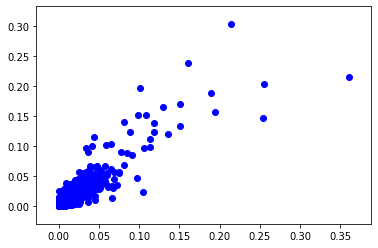

In [601]:
import matplotlib.pyplot as plt

x = [i for i in range(len(leave_vector))]

from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
data = np.array([leave_vector, remain_vector])
tfidf = TfidfTransformer()
tfidf.fit(data)

X = tfidf.transform([leave_vector, remain_vector]).toarray()

plt.scatter(X[0], X[1], c='b')
print(X[0])

In [577]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
data = np.array([leave_cons_vector, remain_cons_vector, remain_labor_vector])
tfidf = TfidfTransformer()
tfidf.fit(data)


TfidfTransformer()

In [578]:
X = tfidf.transform([leave_cons_vector, remain_cons_vector, remain_labor_vector]).toarray()

In [579]:
sim = cosine_similarity(X)
sim

array([[1.        , 0.67289954, 0.56540865],
       [0.67289954, 1.        , 0.82413278],
       [0.56540865, 0.82413278, 1.        ]])

In [580]:
import pandas as pd
names = ['leave_cons', 'remain_cons', 'remain_labour']
rows = []
i = 0
for n in names:
    row = [n]
    row.extend(sim[i])
    i+=1
    rows.append(row)
res_df = pd.DataFrame(rows, columns=['type'] + names)
res_df.to_csv('similarity1.csv')
res_df

,type,leave_cons,remain_cons,remain_labour
0,leave_cons,1.000000,0.672900,0.565409
1,remain_cons,0.672900,1.000000,0.824133
2,remain_labour,0.565409,0.824133,1.000000


In [581]:
data = np.array([leave_vector, remain_vector, labour_vector, cons_vector])
tfidf = TfidfTransformer()
tfidf.fit(data)

TfidfTransformer()

In [582]:
X2 = tfidf.transform([leave_vector, remain_vector, labour_vector, cons_vector]).toarray()
sim2 = cosine_similarity(X2)
sim2

array([[1.        , 0.912345  , 0.96620406, 0.82510834],
       [0.912345  , 1.        , 0.9652896 , 0.94812602],
       [0.96620406, 0.9652896 , 1.        , 0.84741644],
       [0.82510834, 0.94812602, 0.84741644, 1.        ]])

In [583]:
import pandas as pd
names = ['leave', 'remain', 'labour', 'conservative']
rows = []
i = 0
for n in names:
    row = [n]
    row.extend(sim2[i])
    i+=1
    rows.append(row)
res_df = pd.DataFrame(rows, columns=['type'] + names)
res_df.to_csv('similarity2.csv', index=False)
res_df

,type,leave,remain,labour,conservative
0,leave,1.000000,0.912345,0.966204,0.825108
1,remain,0.912345,1.000000,0.965290,0.948126
2,labour,0.966204,0.965290,1.000000,0.847416
3,conservative,0.825108,0.948126,0.847416,1.000000


In [402]:
scores = [0] * len(leave_vector)
for i in range(len(leave_vector)):
    scores[i] = leave_vector[i] * remain_vector[i]
    

In [404]:
scores = np.array(scores)
top_indices = scores.argsort()[-100:][::-1]

In [407]:
selected_bigrams.iloc[top_indices].to_csv('important_bigrams.csv')

In [ ]:
scores = [0] * len(leave_vector)
for i in range(len(leave_vector)):
    scores[i] = leave_vector[i] * remain_vector[i]

# Common Fraction count

In [371]:
leave_remain_common = pd.merge(leave_bigrams, remain_bigrams, how='inner', on=['bigrams'])
cons_labor_common = pd.merge(cons_bigrams, labour_bigrams, how='inner', on=['bigrams'])
leave_remain_common = leave_remain_common.sort_values(by=['freq_x', 'freq_y']).reset_index(drop=True)
cons_labor_common = cons_labor_common.sort_values(by=['freq_x', 'freq_y']).reset_index(drop=True)

In [372]:
leave_remain_diff = pd.concat([leave_bigrams, remain_bigrams]).drop_duplicates(keep=False)
cons_labor_diff = pd.concat([cons_bigrams, labour_bigrams]).drop_duplicates(keep=False)
leave_remain_diff = leave_remain_diff.sort_values(by=['freq']).reset_index(drop=True)
cons_labor_diff = cons_labor_diff.sort_values(by=['freq']).reset_index(drop=True)

In [373]:
len_leave_remain = len(leave_remain_common)
len_cons_labor = len(cons_labor_common)
len_leave_remain_diff = len(leave_remain_diff)
len_cons_labor_diff = len(cons_labor_diff)

In [374]:
leave_remain_common = leave_remain_common[int(len_leave_remain*0.4): int(len_leave_remain*0.97)]
cons_labor_common = cons_labor_common[int(len_cons_labor*0.4): int(len_cons_labor*0.97)]
leave_remain_diff = leave_remain_diff[int(len_leave_remain_diff*0.4): int(len_leave_remain_diff*0.97)]
cons_labor_diff = cons_labor_diff[int(len_cons_labor_diff*0.4): int(len_cons_labor_diff*0.97)]

In [375]:
leave_remain_common

,bigrams,freq_x,freq_y
94514,success.like,1,3
94515,success.first,1,3
94516,success.export,1,3
94517,success.everi,1,3
94518,success.extend,1,3
...,...,...,...
229193,work.issu,11,40
229194,member.torfaen,11,40
229195,area.also,11,40
229196,also.appli,11,40


In [376]:
leave_remain_diff

,bigrams,freq
598822,comprehens.extend,1
598823,comprehens.easier,1
598824,comprehens.demonstr,1
598825,comprehens.dedic,1
598826,comprehens.debat,1
...,...,...
1452140,state.fund,10
1452141,monday.morn,10
1452142,caith.sutherland,10
1452143,pension.freedom,10


In [377]:
x = (leave_remain_common['freq_x'].sum() + leave_remain_common['freq_y'].sum()) / (leave_bigrams['freq'].sum() + remain_bigrams['freq'].sum())

In [378]:
y = (cons_labor_common['freq_x'].sum() + cons_labor_common['freq_y'].sum()) / (cons_bigrams['freq'].sum() + labour_bigrams['freq'].sum())

In [379]:
a = leave_remain_diff['freq'].sum() / (cons_bigrams['freq'].sum() + labour_bigrams['freq'].sum())

In [380]:
b = cons_labor_diff['freq'].sum() / (cons_bigrams['freq'].sum() + labour_bigrams['freq'].sum())

In [381]:
rows = [['leave-remain', x, a], ['cons-labour', y, b]]
res_df = pd.DataFrame(rows, columns=['type', 'common', 'diff'])

In [382]:
res_df

,type,common,diff
0,leave-remain,0.336983,0.451865
1,cons-labour,0.351381,0.446351


In [401]:
res_df.to_csv('text_split_metric.csv')

# Entropy

In [394]:
import numpy as np
n_all_bigrams = all_bigrams['freq'].sum()
n_leave = leave_bigrams['freq'].sum()
n_remain = remain_bigrams['freq'].sum()
n_cons = cons_bigrams['freq'].sum()
n_labor = labour_bigrams['freq'].sum()

frac_leave = n_leave / n_all_bigrams
frac_remain = n_remain / n_all_bigrams
frac_cons = n_cons / n_all_bigrams
frac_labor = n_labor / n_all_bigrams

In [398]:
entropy = -1*(frac_leave*np.log2(frac_leave) + frac_remain*np.log2(frac_remain))

In [399]:
entropy

-1039.1501127507636

In [400]:
entropy = -1*(frac_cons*np.log2(frac_cons) + frac_labor*np.log2(frac_labor))
entropy

-1019.9630612781684